#### Testing out Gibbs zig-zag code:

In [1]:
using Distributions, TimeIt, ProgressMeter, PyPlot
include("zz_structures.jl")
include("mbsampler.jl")

get_clustering (generic function with 1 method)

In [2]:
d, Nobs = 20, 100
p = 1e-1
X = rand(Normal(), d, Nobs) .* rand(Binomial(1,p), d, Nobs)
X[1,:] = ones(Nobs)
ξ_true = rand(Normal(),d).* rand(Binomial(1,0.5), d)
ξ_true[1] = rand(Normal())
y = [rand(Binomial(1, 1/(1+exp(-ξ_true'X[:,j]))), 1)[1] + 0. for j in 1:Nobs];
mb_size = 10
σ02 = 1

prior = HS_prior(d, σ02)

HS_prior(20, 1.0, [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 1.0, [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 1.0)

In [3]:
my_ll = ll_logistic(X,y);
my_model = model(my_ll, prior)
root = find_root(my_model, rand(d));

In [4]:
# Sub-sampling with weights 
ϵ = 1e-2
weights = abs.(X) + ϵ
weights ./= sum(weights,2)
mb_size = 10;
gs = [wumbsampler(Nobs, mb_size, weights[i,:]) for i in 1:d]
gs_list = mbsampler_list(d,gs);

In [5]:
T_gibbs = 5_000
n_gibbs = 1_00  # number of bouncing attempts per Gibbs step

A = eye(d)
opf = projopf(A, 100) #initialise it
opt = maxa_opt(1)
outp = outputscheduler(opf,opt)
samples = gzz_samples(d,T_gibbs);

In [6]:
GZZ_sample(my_model, outp, gs_list, samples, T_gibbs, n_gibbs);

Progress: 100%|█████████████████████████████████████████| Time: 0:01:05


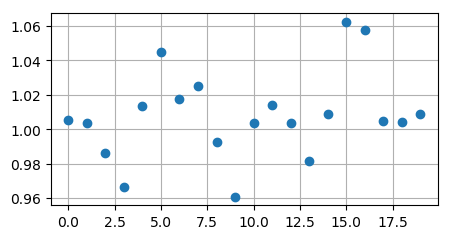

In [7]:
fig = figure("pyplot_barplot",figsize=(5,2.5))
plot([compute_configT(my_model, samples, k) for k in 1:d], "o")
grid(true)

In [10]:
rand(Exponential(10))

21.96079483762189

#### Posterior summaries:

In [28]:
print("posterior variances: ", [var(samples.xi_samples[i,:]) for i in 1:d], "\n")
print("posterior means    : ", [mean(samples.xi_samples[i,:]) for i in 1:d], "\n") 
print("true xi value      : ", ξ_true)

posterior variances: [0.31305, 2.97753, 1.41762, 1.07549, 0.987124, 1.68801, 2.42887, 3.80637, 3.11643, 1.52468, 4.82378, 0.727354, 2.07547, 2.03446, 9.50837, 1.15351, 1.02391, 1.11554, 1.08498, 0.997897, 5.51162, 1.90909, 2.15066, 4.98149, 0.6582, 5.57169, 3.21338, 1.71428, 3.21774, 2.14763, 1.35833, 1.90063, 1.8931, 1.0906, 1.58933, 3.2059, 2.74881, 1.04494, 1.43749, 2.65705, 1.81048, 3.30231, 1.94329, 11.5626, 4.16948, 1.29949, 2.27987, 6.32598, 4.06528, 1.5249]
posterior means    : [-2.23773, 3.04589, 1.69925, -0.469693, 0.393517, -0.999613, 2.79372, 3.96086, 1.88281, -0.183959, -2.64013, 0.621312, 0.335916, -0.525036, -5.73537, -1.46627, 1.39395, -0.262753, 0.408396, 0.0850821, 2.95556, 1.49889, 1.13366, -3.07182, -0.277696, 1.77458, 1.12842, 1.89927, 0.820322, -2.16899, 0.27105, 0.31527, -0.995848, 0.260624, 1.77017, 2.85273, 0.991793, 0.200771, 0.659838, -2.44036, 2.46329, 0.416757, -0.381733, 6.9001, 2.80433, 1.93425, 1.11208, 4.38547, -3.8717, -1.22312]
true xi value      : [-

In [ ]:
α